In [2]:
using CairoMakie

In [3]:
k = 10 .^(-5:0.01:1);
ω(k; g=9.81, H=4000) = sqrt(g*k*tanh(k*H));
cp(k; g=9.81, H=4000) = sqrt(g*k*tanh(k*H))/k;
cg(k; g=9.81, H=4000) = g*(tanh(k*H)+k*H*sech(k*H)^2)/(2sqrt(g*k*tanh(k*H)))

c_shallow(k; g=9.81, H=4000) = sqrt(g*H)
cp_deep(k; g=9.81, H=4000) = sqrt(g/k)
cg_deep(k; g=9.81, H=4000) = 0.5sqrt(g/k)

cg_deep (generic function with 1 method)

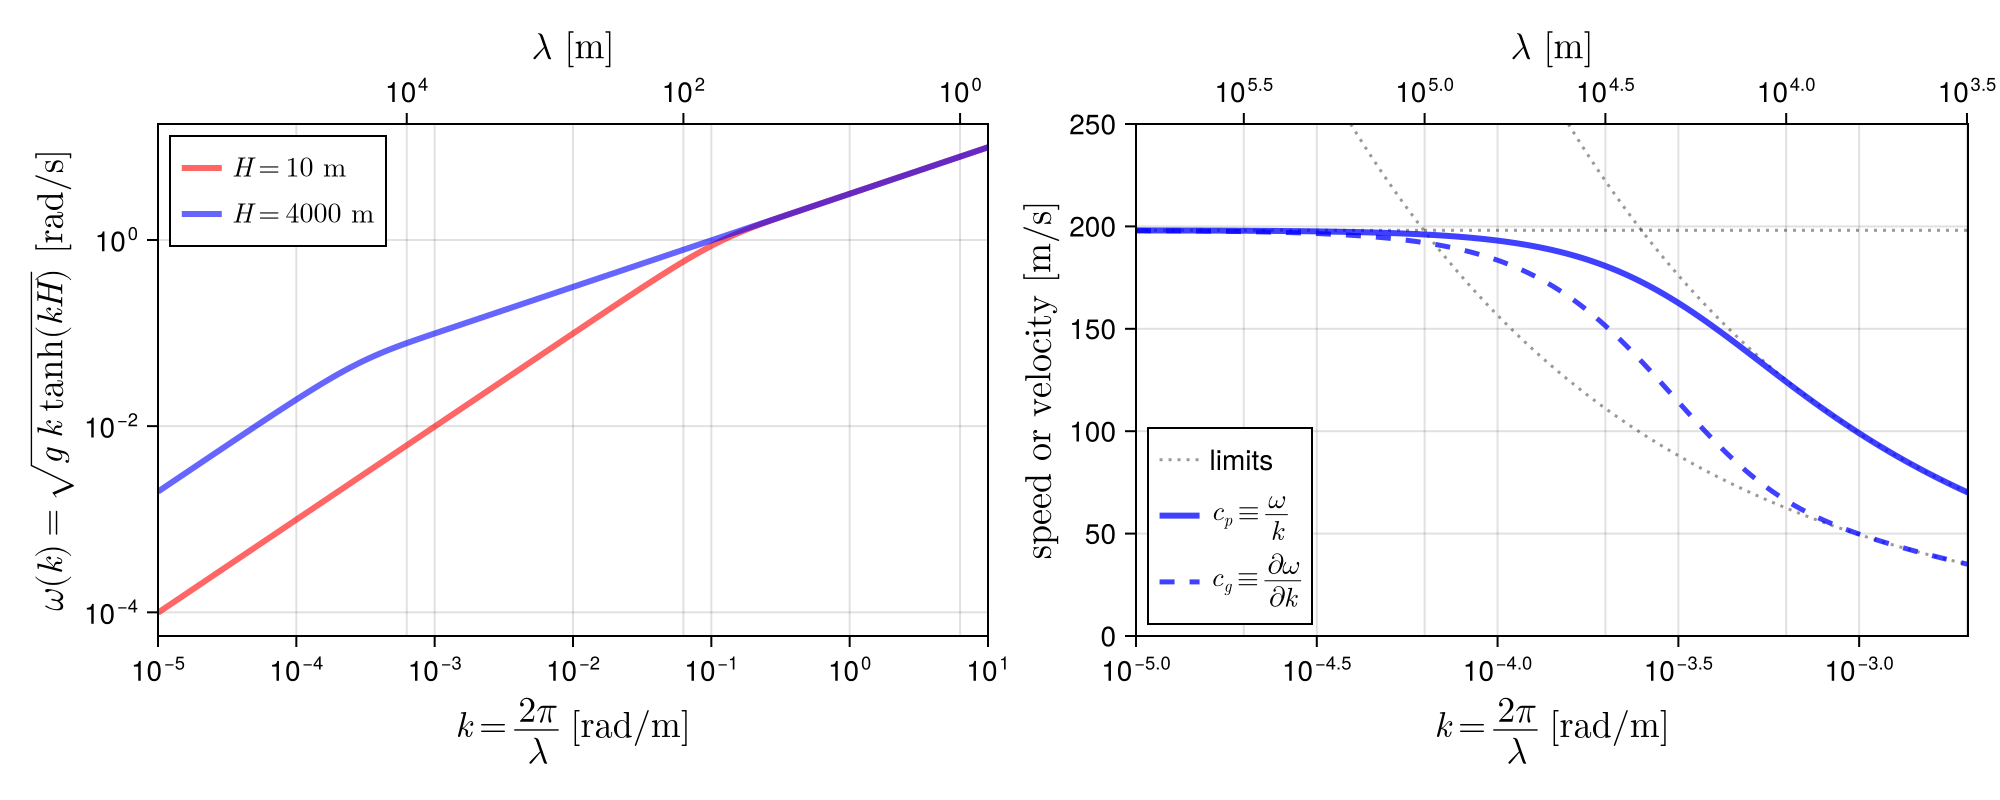

In [4]:
f = Figure(size=(1000, 400))
ax = Axis(
    f[1, 1], yscale = log10, xscale = log10, xlabelsize=18, ylabelsize=18, limits=((1e-5, 1e1),(nothing, nothing)),
    xlabel=L"$k=\frac{2\pi}{\lambda}$ [rad/m]", ylabel=L"$\omega(k) = \sqrt{g \; k\; \tanh(kH)}$ [rad/s]"
)
ax2 = Axis(f[1, 1], xscale=log10, xaxisposition = :top, limits=(2π./(1e1, 1e-5), (nothing, nothing)), xreversed=true, xlabel=L"$\lambda$ [m]", xlabelsize=18)
lines!(ax, k, ω.(k, H=10), linewidth=3, alpha=0.6, label=L"$H=10$ m", color=:red)
lines!(ax, k, ω.(k, H=4000), linewidth=3, alpha=0.6, label=L"$H=4000$ m", color=:blue)
axislegend(ax, position=:lt)
hideydecorations!(ax2)

khi = 2e-3
ax = Axis(
    f[1, 2], xscale = log10, xlabelsize=18, ylabelsize=18, limits=((1e-5, khi),(0, 250)),
    xlabel=L"$k=\frac{2\pi}{\lambda}$ [rad/m]", ylabel=L"$$speed or velocity [m/s]",
)
ax2 = Axis(f[1, 2], xscale=log10, xaxisposition = :top, limits=(2π./(khi, 1e-5), (0, 250)), xreversed=true, xlabel=L"$\lambda$ [m]", xlabelsize=18)
hideydecorations!(ax2)

lines!(ax, k, c_shallow.(k, H=4000), linewidth=1.5, label="limits", color=:black, linestyle=:dot, alpha=0.4)
lines!(ax, k, cp_deep.(k, H=4000), linewidth=1.5, color=:black, linestyle=:dot, alpha=0.4)
lines!(ax, k, cg_deep.(k, H=4000), linewidth=1.5, color=:black, linestyle=:dot, alpha=0.4)
lines!(ax, k, cp.(k, H=4000), linewidth=3, alpha=0.75, label=L"$c_{p} \equiv \frac{\omega}{k}$", color=:blue)
lines!(ax, k, cg.(k, H=4000), linewidth=2.5, alpha=0.75, label=L"$c_{g} \equiv \frac{\partial \omega}{\partial k}$", color=:blue, linestyle=:dash)
axislegend(ax, position=:lb)

save("../figures/Lecture15_surface_gravity_wave_dispersion.png", f)
f